# Análise Exploratória de Dados (EDA) - Previsão de Cancelamento de Clientes

Este notebook tem como objetivo realizar uma análise exploratória do dataset `cancelamentos.csv`, com o propósito de entender os padrões e comportamentos que levam clientes a cancelar seus serviços. 

Vamos investigar variáveis como idade, assinatura, atrasos, chamadas ao call center e outros fatores que possam contribuir para o churn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações estéticas
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Leitura dos dados
df = pd.read_csv('../data/raw/cancelamentos.csv')

# Visualização geral
df.head()

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


## Informações Iniciais do Dataset

Vamos verificar a estrutura geral do dataset, tipos de variáveis e a presença de dados ausentes.

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CustomerID              881664 non-null  float64
 1   idade                   881664 non-null  float64
 2   sexo                    881664 non-null  object 
 3   tempo_como_cliente      881663 non-null  float64
 4   frequencia_uso          881663 non-null  float64
 5   ligacoes_callcenter     881664 non-null  float64
 6   dias_atraso             881664 non-null  float64
 7   assinatura              881661 non-null  object 
 8   duracao_contrato        881663 non-null  object 
 9   total_gasto             881664 non-null  float64
 10  meses_ultima_interacao  881664 non-null  float64
 11  cancelou                881664 non-null  float64
dtypes: float64(9), object(3)
memory usage: 80.7+ MB


CustomerID                2
idade                     2
sexo                      2
tempo_como_cliente        3
frequencia_uso            3
ligacoes_callcenter       2
dias_atraso               2
assinatura                5
duracao_contrato          3
total_gasto               2
meses_ultima_interacao    2
cancelou                  2
dtype: int64

## Limpeza de Dados

Remoção de linhas com valores ausentes para garantir uma análise consistente.

In [4]:
df = df.dropna()

## Estatísticas Descritivas

Aqui vamos ver medidas de tendência central e dispersão para as variáveis numéricas.

In [5]:
df.describe()

,CustomerID,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
count,881659.000000,881659.000000,881659.000000,881659.000000,881659.000000,881659.000000,881659.000000,881659.000000,881659.000000
mean,225399.946108,39.373179,31.256329,15.807526,3.604434,12.965727,631.617210,14.480866,0.567105
std,129531.100415,12.442359,17.255716,8.586247,3.070221,8.258047,240.802385,8.596216,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113623.500000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226127.000000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337740.000000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## Visualição da Variável Principal

Após a limpeza e análise inicial, vamos verificar a como está a distribuição dos cancelamentos, que é o alvo dessa análise.

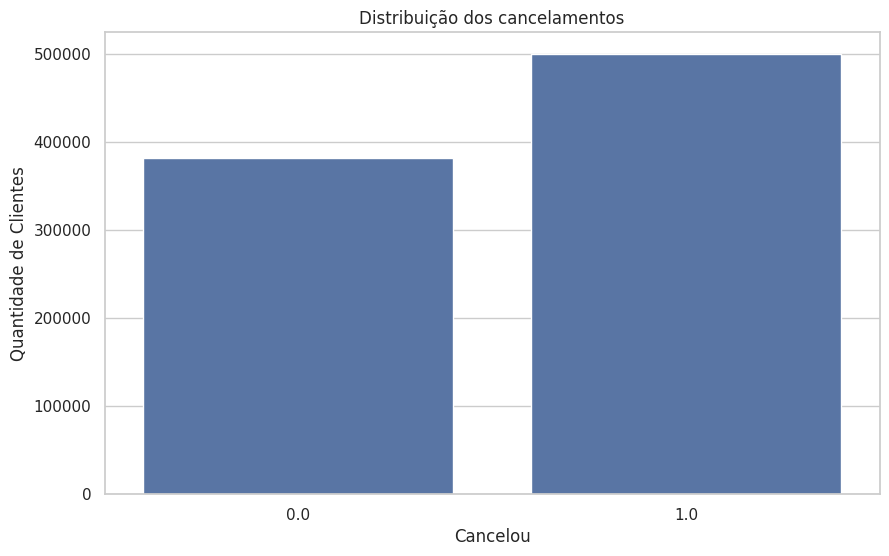

cancelou
1.0    56.710474
0.0    43.289526
Name: proportion, dtype: float64


In [6]:
sns.countplot(data=df, x='cancelou')
plt.title("Distribuição dos cancelamentos")
plt.xlabel("Cancelou")
plt.ylabel("Quantidade de Clientes")
plt.show()

# Ver a proporção percentual
print(df['cancelou'].value_counts(normalize=True) * 100)

## Primeiras Considerações

Nesse Dataset os clientes que cancelaram são representados pelo número 1, enquanto os que não cancelaram são representados pelo número 0.

Dito isto, podemos observar que existe uma alta taxa de cancelamentos, ultrapassando os 50%. A partir disso, vamos buscar entender as causas desses cancelamentos e apresentar soluções para suprimir  a perda de clientes.

Faremos um mapa de correlação para identificar os primeiros pontos chave.

In [7]:
import plotly.express as px

correlacao = df.corr(numeric_only=True)

fig = px.imshow(
    correlacao,
    text_auto=".2f",  # mostra os valores dentro das células com 2 casas decimais
    color_continuous_scale='RdBu_r',  # escala de cores bonita e invertida
    title="Mapa de Correlação"
)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()


Observa-se algumas variáveis chamando atenção no mapa de correlação, mas ainda não temos nada conclusivo, continuaremos a exploração dos dados.

Faremos agora o cruzamento direto dos cancelamentos com outras variáveis do Dataset, para identificar possíveis padrões.

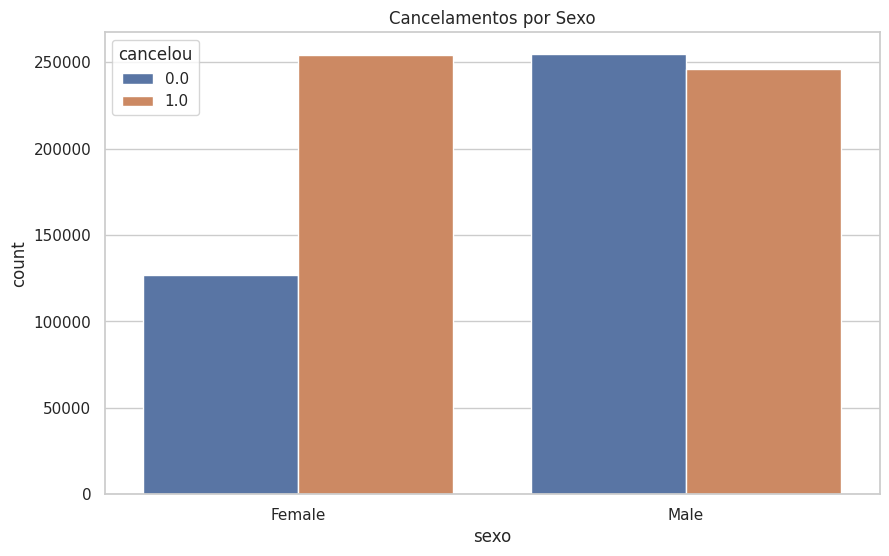

In [8]:
sns.countplot(data=df, x='sexo', hue='cancelou')
plt.title('Cancelamentos por Sexo')
plt.show()

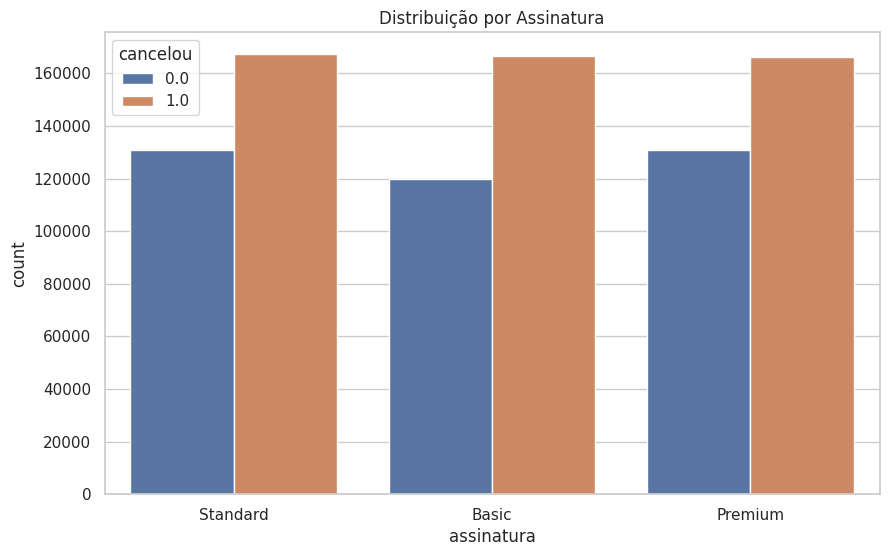

In [9]:
sns.countplot(data=df, x='assinatura', hue='cancelou')
plt.title('Distribuição por Assinatura')
plt.show()

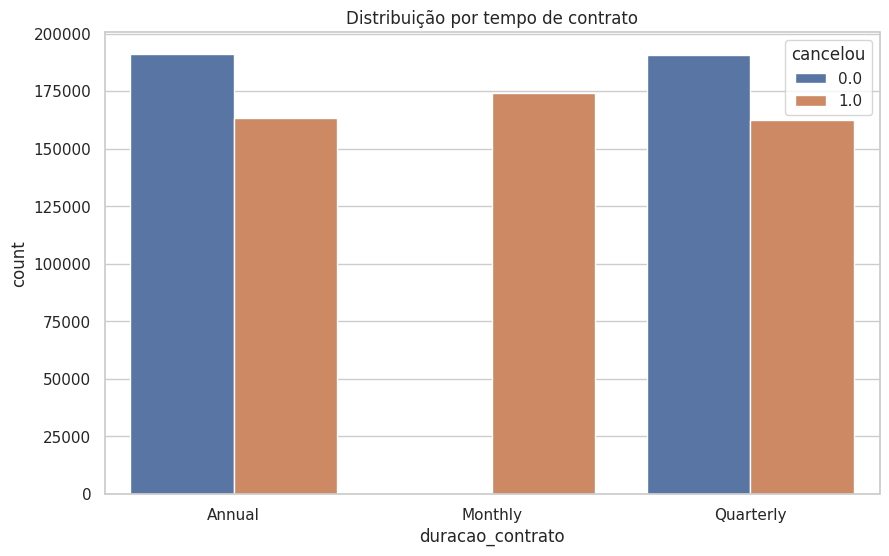

In [10]:
sns.countplot(data=df, x='duracao_contrato', hue='cancelou')
plt.title('Distribuição por tempo de contrato')
plt.show()

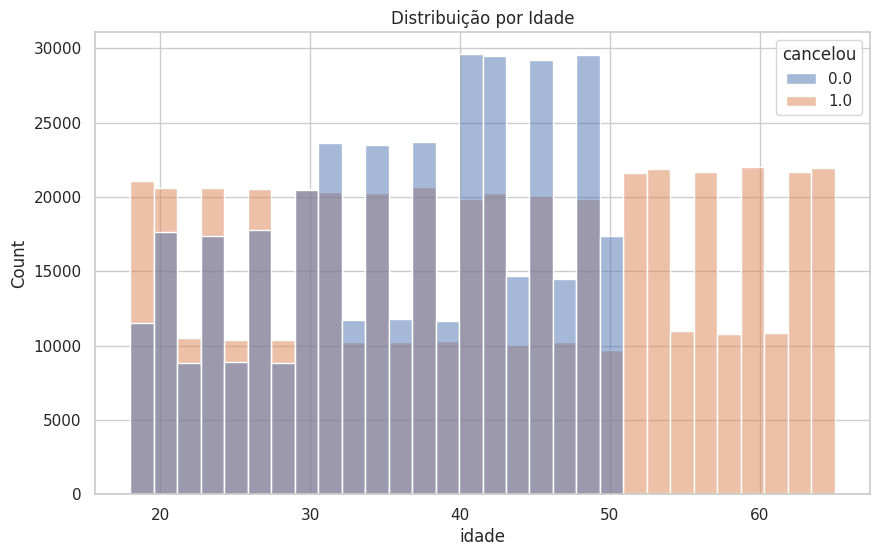

In [11]:
sns.histplot(data=df, x='idade', bins=30, hue='cancelou')
plt.title('Distribuição por Idade')
plt.show()

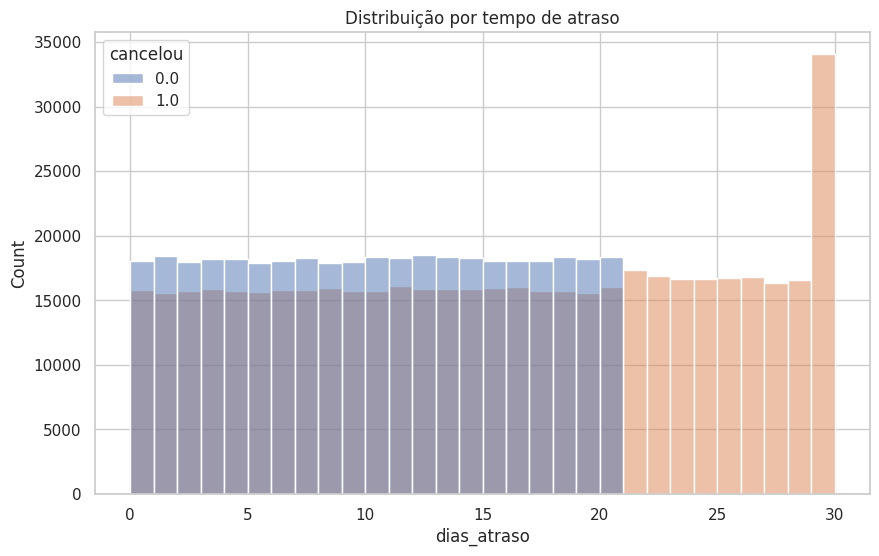

In [12]:
sns.histplot(data=df, x='dias_atraso', bins=30, hue='cancelou')
plt.title('Distribuição por tempo de atraso')
plt.show()

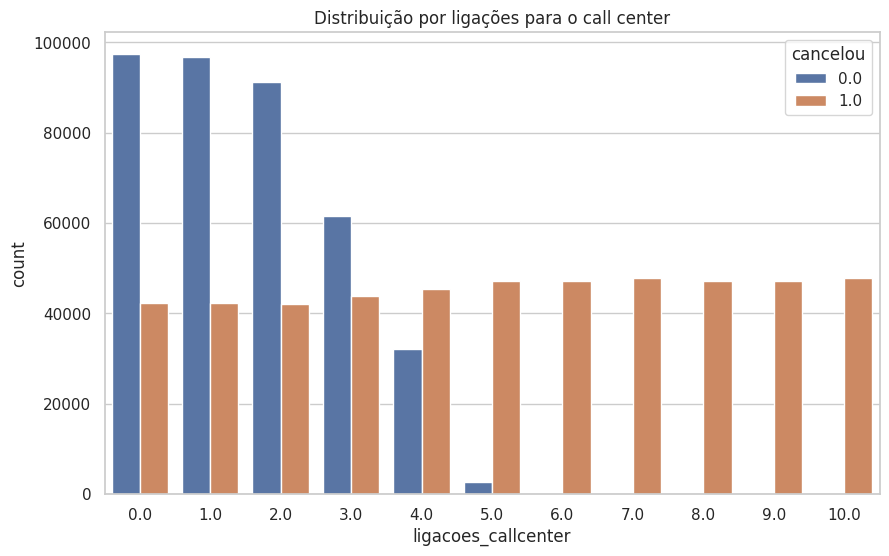

In [13]:
sns.countplot(data=df, x='ligacoes_callcenter', hue='cancelou')
plt.title('Distribuição por ligações para o call center')
plt.show()

## Após avaliação visual do dados, alguns pontos interessantes foram analisados.

### 1 - O público feminino tem uma alta taxa de cancelamento.
    Pode indicar maior insatisfação nesse segmento, ou talvez uma comunicação de retenção menos eficaz. É algo para a empresa investigar do ponto de vista de UX e marketing.

### 2 - 100% dos clientes com assinatura mensal cancelam.
    Hipótese: gente que entra só pra testar e já sai. Pode ser que o plano mensal atrai mais churners naturais. Um ótimo ponto para repensar o modelo.

### 3 - 50% dos clientes até 20 anos, e 100% dos clientes acima de 50 anos cancelam.
    Jovens até 20 → 50% cancelam → talvez sejam mais impulsivos ou não enxerguem valor a longo prazo.

    Acima de 50 → 100% de cancelamento. Pode ser problema de usabilidade, atendimento, ou falta de fit com o serviço.

### 4 - 100% dos clientes com mais de 20 dias de atraso cancelam.
    Essa aqui é praticamente uma regra de decisão pronta pro modelo!
    Cliente atrasou mais de 20 dias? Grandes chances de cancelamento.

### 5 - 100% dos clientes que ligam mais de 4 vezes para o call center cancelam.
    Outro ponto de estudo para a empresa, o atendimento do setor call center, e o tempo para a resolução dos chamados.
    Pode-se ainda fazer uma correlação com os clientes maiores que 50 anos e o número de ligações, para entender ser esse é o público que mais liga.


## Visualização Gráfica dos Padrões Observados

Agora que identificamos alguns padrões de cancelamento ao longo da análise, vamos gerar os principais gráficos para ilustrar esses comportamentos.

Os gráficos serão salvos na pasta `outputs/plots/` e podem ser utilizados no relatório (`docs/EDA.md`) ou na apresentação visual do projeto.


In [18]:
import sys
import os

# Adiciona a raiz do projeto ao path
sys.path.append(os.path.abspath(".."))

from src.eda_plotting import gerar_todos_os_graficos

gerar_todos_os_graficos(df)